# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1. Is the distribution of body temperatures normal?
<li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
<li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

### 1) compare probability density functions (PDFs) of body temperature with simulated normal distribution data

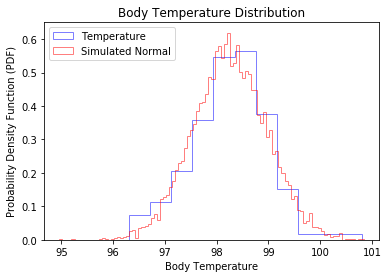

In [3]:
#extract temperature data
temp = df['temperature']
#calculate mean and standard deviation for simulating normal distribution
mean = np.mean(temp)
std = np.std(temp)
#use np.random.normal() to aquire a large set of samples from the normal distribution
norm = np.random.normal(mean, std, size=10000)

#plot PDF of body temperature 
_ = plt.hist(temp, bins=int(np.sqrt(len(temp))), density=True, histtype='step', color='blue', alpha=0.5)
#plot PDF of simulated normal distribution on the same plot
_ = plt.hist(norm, bins=int(np.sqrt(len(norm))), density=True, histtype='step', color='red', alpha=0.5)

#annotation
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Probability Density Function (PDF)')
_ = plt.legend(('Temperature','Simulated Normal'),loc='upper left')
_ = plt.title('Body Temperature Distribution')

### 2) compare cumulative distribution functions (CDFs) of temperature with simulated normal distribution data
Since PDF is subject to binning bias, it's best to check the CDF and compare it to a normal distribution as well.

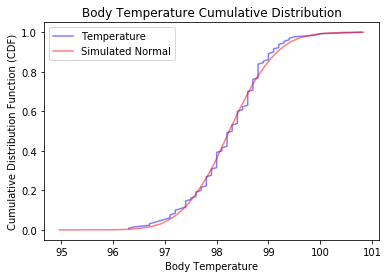

In [4]:
#user-defined funciton for computing ECDF of a given array
def ecdf(array):
    """Compute empirical cumulative distribution function (ECDF) of a given 1-D array"""
    #sort array to use as the x axis
    x = np.sort(array)
    #use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    #return x and y as the data for x axis and y axis, repectively
    return x,y

#compute CDF for body temperature and the simulated normal distribution data
x_temp, y_temp = ecdf(temp)
x_norm, y_norm = ecdf(norm)

#plot CDF of body temperature and the simulated normal distribution data
_ = plt.plot(x_temp, y_temp, color='blue', alpha=0.5)
_ = plt.plot(x_norm, y_norm, color='red', alpha=0.5)

#annotation
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Cumulative Distribution Function (CDF)')
_ = plt.legend(('Temperature','Simulated Normal'),loc='upper left')
_ = plt.title('Body Temperature Cumulative Distribution')

### 3) Access normal probability plot of body temperature data
Reference: https://en.wikipedia.org/wiki/Normal_probability_plot

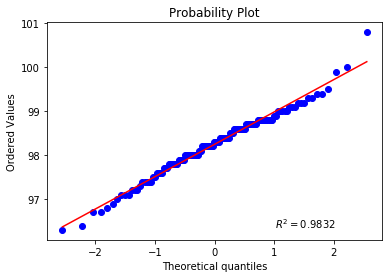

In [5]:
#import scipy.stats module for creating the probability plot
from scipy import stats
#calculate and plot the probability plot
_ = stats.probplot(temp, plot=plt, fit=True, rvalue=True)

### 4) Conclusion:
The histogram is symmetric and unimodal, both PDF and CDF plots show a good match between the body temperature data and the simulated normal distribution data. In addition, the probability plot shows a fairly good fit to the straight line, with just one large value deviated from the line. This suggests that the body temperature data is normally distributed.

## Q2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [6]:
#calculate sample size and determine if it is statistically large
print("Sample size is: ", len(temp))

Sample size is:  130


### 1) Sample size
<p>Since 130 is much larger than 30, which is generally considered to be the boundary between small and large samples, this body temperature sample is considered large from the statistical point of view. </p>

### 2) Independence
<p>Since this sample is drawn to estimate the true temperature of the population, which is the entire human race. The population size is many orders of magnitude larger than the sample size. Therefore, based on the 10% rule, it's safe to consider the observations in this sample as independent. </p>

## Q3. Is the true population mean really 98.6 degrees F?
<p>First, try a bootstrap hypothesis test.</p>
<p> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?</p>
<p> In this situation, is it appropriate to use the  $t$  or  $z$  statistic?</p>
<p> Now try using the other test. How is the result be different? Why?</p>

### 1) Bootstrap hypothesis test
<p>**Null hypothesis:** the true population mean is indeed 98.6 degrees F</p>
<p>**Test statistics:** mean</p>
<p>**Method:** one sample test</p>

In [7]:
#user defined functions to generate a desired number of bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Generate a desired number of bootstrap replicates using the specified method of calculating the test statistics"""
    #initialize the empty array of desired size for storing the bootstrap replicates 
    bs_reps = np.empty(size)
    #generate replicates
    for i in range(size):
        #use np.random.choice to perform bootstraping and calculate the test statistics
        bs_reps[i] = func(np.random.choice(data,size=len(data)))
    return bs_reps

#define pop_mean to store the hypothesized population mean
pop_mean = 98.6
#shift the body temperature data so that its mean matches with the hypothesized true population mean
temp_shifted = temp - np.mean(temp) + pop_mean

#compute 10,000 bootstrap replicates from the shifted temperature data
bs_reps = draw_bs_reps(temp_shifted, np.mean, size=10000)
#calculate p-value
p = np.sum(bs_reps <= np.mean(temp))/len(bs_reps)

#print the p-value
print("p value is: ", p)

p value is:  0.0


P value is near 0, suggesting it will be almost impossible to obtain a sample from the population with sample mean equals to the mean body temperature observed in this sample if the null hypothesis is true. 
Therefore, the null hypothesis is rejected, and the true population mean is not 98.6 degrees F.

### 2) Frequentist statistical testing
In this case, a **one-sample test** is appropriate, because there is only one set of measurement data and a hypothesized mean value.

Both $t$ statistic and $z$ statistic are valid in this situation. $t$ statistic is most appropriate when the population standard deviation is unknown and the sample standard deviatin is used instead. But when sample size reaches reasonably large numbers(e.g. >30), $t$ distribution approaches $z$ distribution. Therefore, $t$ score becomes very close to $z$ score. 
The sample size in this case is 130, therefore using $t$ statistic is very similar to using $z$ statistic, both are valid. 

### Using $t$ statistic:
<p>Null hypothesis: the true population mean is indeed 98.6 degrees F</p>
<p>Method: one sample test</p>
<p>Significance level: $\alpha$=0.05</p>

In [8]:
#sample mean and standard deviation have been calculated above and stored in variables mean, std
#define pop_mean to store the hypothesized population mean
pop_mean = 98.6

#calculate the standard error of sample mean, using sample standard deviation divided by the square root of sample size
mean_std = std/np.sqrt(len(temp))
#calculate t statistic
t = (mean-pop_mean)/mean_std
#calculate degree of freedom
degree = len(temp) - 1

#print t statistic and degree of freedom
print("t=", t, "\ndegree of freedom=", degree)

t= -5.475925202078116 
degree of freedom= 129


<p>Use a $t$ table to look up the p value for one tail test when degree of freedom is 129: </p>
<p>**p($t$ <= -5.476) < 0.0005** </p>
<p>Given that not only p<$\alpha$, but also p is a very small value, it is relatively safe to reject the null hypothesis. Therefore, the true populatin mean is not 98.6 degrees F. </p>
<p>This is in agreement with the conclusion from the bootstrap hypothesis test.</p>

### Using $z$ statistic:
<p>Null hypothesis: the true population mean is indeed 98.6 degrees F</p>
<p>Method: one sample test</p>
<p>Significance level: $\alpha$=0.05</p>

In [9]:
#use sample standard deviation to estimate the population standard deviation and calculate $z$ statistic
z = (mean-pop_mean)/(std/np.sqrt(len(temp)))
#print z statistic
print("z=", z)

z= -5.475925202078116


<p>Use a $z$ table to look up the p value for one tail test: </p>
<p>**p($z$ <= -5.476) < 0.0001** </p>
<p>Given that not only p<$\alpha$, but also p is a very small value, the null hypothesis should be rejected. Therefore, the true populatin mean is not 98.6 degrees F.</p>
<p>The result in the $z$ test is very similar to the above $t$ test, because when sample size is much larger than 30, t distribution really approaches z distribution, the p-values from both tables are fairly close, and the conclusions are usually in good agreement.</p>

## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
<p>Which one is the correct one to use? </p>
<p>What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?</p>

### Draw a small sample of size 10 from the temperature data

In [10]:
#seed the random generator to ensure reproducible result
np.random.seed(30)
#use np.random.choice to draw a sample of size 10
temp_2 = np.random.choice(temp, size=10)

### Using $t$ statistic:
<p>Null hypothesis: the true population mean is indeed 98.6 degrees F</p>
<p>Method: one sample test</p>
<p>Significance level: $\alpha$=0.05</p>

In [11]:
#calculate sample mean and standard deviation for the smaller sample temp_2
mean_2 = np.mean(temp_2)
std_2 = np.std(temp_2)

#define pop_mean to store the hypothesized population mean
pop_mean = 98.6

#calculate the standard error of sample mean, using sample standard deviation divided by the square root of sample size
mean_std = std_2/np.sqrt(len(temp_2))
#calculate t statistic
t = (mean_2-pop_mean)/mean_std
#calculate degree of freedom
degree = len(temp_2) - 1

#print t statistic and degree of freedom
print("t=", t, "\ndegree of freedom=", degree)

t= -1.0717502734539783 
degree of freedom= 9


<p>Use a $t$ table to look up the p value for one tail test when degree of freedom is 9: </p>
<p>**p($t$ <= -1.072) is between 0.15 and 0.20 **</p>
<p>Given that p>$\alpha$, we fail to reject the null hypothesis. Therefore, it's plausible that the true populatin mean is indeed 98.6 degrees F</p>

### Using $z$ statistic:
<p>Null hypothesis: the true population mean is indeed 98.6 degrees F</p>
<p>Method: one sample test</p>
<p>Significance level: $\alpha$=0.05</p>

In [12]:
#use sample standard deviation to estimate the population standard deviation and calculate $z$ statistic
z = (mean_2-pop_mean)/(std_2/np.sqrt(len(temp_2)))
#print z statistic
print("z=", z)

z= -1.0717502734539783


<p>Use a $z$ table to look up the p value for one tail test: </p>
<p>**p($z$ <= -1.072) is between 0.1401 and 0.1423**</p>
<p>Given that p>$\alpha$, we fail to reject the null hypothesis. Therefore, it's plausible that the true populatin mean is indeed 98.6 degrees F.</p>

### Comparison & Conclusion
In this case of a smaller sample of size 10, p-values from the $t$ table and the $z$ table show a large difference, 0.15-0.20 vs 0.1401-0.1423. 

For small sample sizes (especially <30), the sampling distribution of sample mean is flatter than the normal distribution, **a $t$ table** should be used if the sample standard deviation is used to estimate the population deviation. 
For large sample sizes (at least >30), the sampling distribution of sample mean is close to the normal distribution. Therefore, both $t$ table and $z$ table are valid and their results are similar.

## Q5. At what temperature should we consider someone's temperature to be "abnormal"?
<p>As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.</p>
<p>Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.</p>

### 1) Bootstrap approach
We will use the confidence interval of 95% to determine if the temperature is normal. So if someone's temperature is beyond the 95% interval of the normal distributiuon, then we consider it to be "abnormal".
Bootstrap approach is used to simulate the 95% confidence interval.

In [13]:
#use sample mean and standard deviation to estimate the population mean and standard deviation
#use np.random.normal() to draw a large size of samples from the normal distribution
temps = np.random.normal(mean,std,size=100000)

#compute the margin of error for 95% confidence interval, the corresponding z value is 1.96
error = 1.96 * np.std(temps)

#use np.percentile() to extract the 95% confidence interval
con_int = np.percentile(temps,[2.5,97.5])

print("Margin of error is:", error)
print("95% confidence interval is: ", con_int)
print("If someone's temperature is out of ", con_int, " degree F, it should be considered 'abnormal'")

Margin of error is: 1.4321848757590234
95% confidence interval is:  [96.81677217 99.67617937]
If someone's temperature is out of  [96.81677217 99.67617937]  degree F, it should be considered 'abnormal'


### 2) Frequentist approach
We will use the confidence interval of 95% to determine if the temperature is normal. 
Frequentist approach is used here to determine the 95% confidence interval. 
Since, we don't know the true population mean and we only have this dataset available, we will use the sample mean temperature as an estimate of the population mean.

In [14]:
#the margin of error and confidence interval is for invidual temperature, therefore the sample size is 1
n = 1

#compute the margin of error
error = 1.96 * std / np.sqrt(n)

#compute the confidence interval, here sample mean is used to estimate the population mean
con_int = mean + np.array([-1, 1]) * error

print("Margin of error is:", error)
print("95% confidence interval is: ", con_int)
print("If someone's temperature is out of ", con_int, " degree F, it should be considered 'abnormal'")

Margin of error is: 1.431501246653874
95% confidence interval is:  [96.81772952 99.68073202]
If someone's temperature is out of  [96.81772952 99.68073202]  degree F, it should be considered 'abnormal'


## Q6. Is there a significant difference between males and females in normal temperature?
<p>What testing approach did you use and why?</p>
<p>Write a story with your conclusion in the context of the original problem.</p>

In [15]:
#extract temperature data for the male group and female groups
male = df[df['gender']=='M']['temperature']
female = df[df['gender']=='F']['temperature']

#print the sample size of the male group and female groups
print("The sample size of the male group is: ", len(male))
print("The sample size of the female group is:", len(female))

The sample size of the male group is:  65
The sample size of the female group is: 65


### 1) Frequentist approach
<p>Two sample test should be used to compare the difference between two samples. Here, we will compare their means to determine if there is a significant difference between the male and female groups. 
Since both groups have a sample size much larger than 30, z statistic will be used.</p>

<p>Hypothesis: there is no significant difference between males and females in normal temperature, i.e. $\mu(male)$-$\mu(female)$=0</p>
<p>Significane level: $\alpha$=0.05</p>

In [16]:
#calculat the mean, standard deviatin and sample size for each group
mean_male = np.mean(male)
std_male = np.std(male)
n_male = len(male)
mean_female = np.mean(female)
std_female = np.std(female)
n_female = len(female)

#calculate the difference between sample means
mean_diff = mean_male - mean_female
#calculate the variance of sample means for the male and female group
var_mean_male = std_male*std_male/n_male
var_mean_female = std_female*std_female/n_female
#calculate the standard deviation of sample mean difference
std_diff = np.sqrt(var_mean_male + var_mean_female)

#calculate z statistic
z = (mean_diff - 0)/std_diff
print("z statistic is: ", z)

z statistic is:  -2.3032202891940123


<p>Use a $z$ table to look up the p value: </p>
<p>**p($z$ <= -2.303) = 0.0099 **</p>
<p>Given that p<$\alpha$, the null hypothesis is rejected. There is a significant difference between males and females in normal temperature.</p>

### 2) Hackers statistic with permutation
<p>In this case, using permutation test is perferred because not only can it test if the two groups share the same mean, but also if they have the same distribution (identical). Therefore, we will use hackers statistic with permutation to simulate and obtain permutation replicates for the hypothesis test.</p>

<p>Hypothesis: there is no significant difference between males and females in normal temperature, i.e. $\mu(male)$-$\mu(female)$=0</p>
<p>Significane level: $\alpha$=0.05</p>

In [17]:
#concatenate two arrays
temp_concat = np.concatenate((male, female))

#initialize an array of desired length to store all the bootstrap replicates
bs_reps = np.empty(10000)

#use for loop to generate a desired number of bootstrap replicates
for i in range(10000): 
    #use permutation to randomize the ordering
    permuted = np.random.permutation(temp_concat) 
    #split the permuted array into two and assign it to the male and female groups
    permuted_male = permuted[:len(male)]
    permuted_female = permuted[len(male):]
    #compute the difference of means as the permutation replicate
    bs_reps[i] = np.mean(permuted_male) - np.mean(permuted_female)
    
#compute the difference between male temperature mean and female temperature mean
mean_diff = mean_male - mean_female
#compute the p-value based on the number of replicates that are at least as extreme as what is observed in the sample
p = np.sum(bs_reps < mean_diff)/len(bs_reps)

#print the p-value
print("p-value is: ",p)

p-value is:  0.013


Given that p< $\alpha$, the null hypothesis is rejected. There is a significant difference between males and females in normal temperature.

### 3) Conclusion
According to the early report by Wunderlich in 1868, the average normal body temperature is 37$^\circ$C or 98.6$^\circ$F. But a modified dataset from a follow-up study in 1992 by Mackowiak, Wasserman and Levine suggests that the true normal body temperature is not 98.6$^\circ$F, but lower. 
In addition, the dataset also classifies the temperature by gender, and the analysis suggests that the male normal temperature is statistically significant from the female normal temperature.  